<a href="https://colab.research.google.com/github/sanket2221/Python_EE/blob/master/Pandapower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-igraph

Ploting a network 

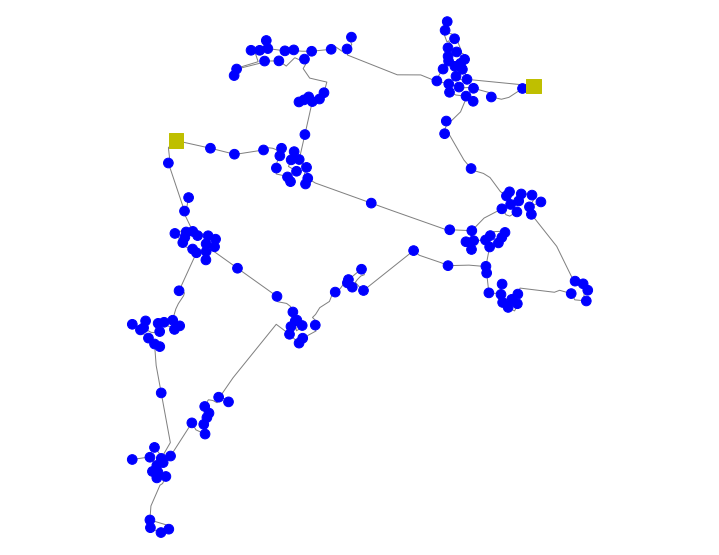

In [53]:
import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as pplt

# get the power system
net = nw.mv_oberrhein()

# use matplotlib
pplt.simple_plot(net)

# use plotly
pplt.simple_plotly(net)

##Create a simple network

In [66]:

import pandapower as pp #import pandapower

net = pp.create_empty_network() #create an empty network

In [67]:
bus1 = pp.create_bus(net, name="HV Busbar", vn_kv=110, type="b")
bus2 = pp.create_bus(net, name="HV Busbar 2", vn_kv=110, type="b")
bus3 = pp.create_bus(net, name="HV Transformer Bus", vn_kv=110, type="n")
bus4 = pp.create_bus(net, name="MV Transformer Bus", vn_kv=20, type="n")
bus5 = pp.create_bus(net, name="MV Main Bus", vn_kv=20, type="b")
bus6 = pp.create_bus(net, name="MV Bus 1", vn_kv=20, type="b")
bus7 = pp.create_bus(net, name="MV Bus 2", vn_kv=20, type="b")

In [68]:
net.bus # show bus table

,name,vn_kv,type,zone,in_service
0,HV Busbar,110.0,b,None,True
1,HV Busbar 2,110.0,b,None,True
2,HV Transformer Bus,110.0,n,None,True
3,MV Transformer Bus,20.0,n,None,True
4,MV Main Bus,20.0,b,None,True
5,MV Bus 1,20.0,b,None,True
6,MV Bus 2,20.0,b,None,True


In [69]:
pp.create_ext_grid(net, bus1, vm_pu=1.02, va_degree=50) # Create an external grid connection (serve as slack node for power flow calculation)

net.ext_grid #show external grid table

,name,bus,vm_pu,va_degree,in_service
0,None,0,1.02,50.0,True


In [70]:
trafo1 = pp.create_transformer(net, bus3, bus4, name="110kV/20kV transformer", std_type="25 MVA 110/20 kV")


In [71]:
net.trafo #show transformer table

,name,std_type,hv_bus,lv_bus,sn_mva,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent,pfe_kw,i0_percent,shift_degree,tap_side,tap_neutral,tap_min,tap_max,tap_step_percent,tap_step_degree,tap_pos,tap_phase_shifter,parallel,df,in_service
0,110kV/20kV transformer,25 MVA 110/20 kV,2,3,25.0,110.0,20.0,12.0,0.41,14.0,0.07,150.0,hv,0,-9,9,1.5,0.0,0,False,1,1.0,True


In [72]:
line1 = pp.create_line(net, bus1, bus2, length_km=10, std_type="N2XS(FL)2Y 1x300 RM/35 64/110 kV",  name="Line 1")
line2 = pp.create_line(net, bus5, bus6, length_km=2.0, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 2")
line3 = pp.create_line(net, bus6, bus7, length_km=3.5, std_type="48-AL1/8-ST1A 20.0", name="Line 3")
line4 = pp.create_line(net, bus7, bus5, length_km=2.5, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 4")

In [73]:
net.line # show line table

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,Line 1,N2XS(FL)2Y 1x300 RM/35 64/110 kV,0,1,10.0,0.0600,0.144,144.0,0.0,0.588,1.0,1,cs,True
1,Line 2,NA2XS2Y 1x240 RM/25 12/20 kV,4,5,2.0,0.1220,0.112,304.0,0.0,0.421,1.0,1,cs,True
2,Line 3,48-AL1/8-ST1A 20.0,5,6,3.5,0.5939,0.372,9.5,0.0,0.210,1.0,1,ol,True
3,Line 4,NA2XS2Y 1x240 RM/25 12/20 kV,6,4,2.5,0.1220,0.112,304.0,0.0,0.421,1.0,1,cs,True


In [74]:
#circuit breakers
sw1 = pp.create_switch(net, bus2, bus3, et="b", type="CB", closed=True)
sw2 = pp.create_switch(net, bus4, bus5, et="b", type="CB", closed=True)


In [75]:
#load break switches ("LBS")
sw3 = pp.create_switch(net, bus5, line2, et="l", type="LBS", closed=True)
sw4 = pp.create_switch(net, bus6, line2, et="l", type="LBS", closed=True)
sw5 = pp.create_switch(net, bus6, line3, et="l", type="LBS", closed=True)
sw6 = pp.create_switch(net, bus7, line3, et="l", type="LBS", closed=False)
sw7 = pp.create_switch(net, bus7, line4, et="l", type="LBS", closed=True)
sw8 = pp.create_switch(net, bus5, line4, et="l", type="LBS", closed=True)

In [76]:
net.switch # show switch table

,bus,element,et,type,closed,name,z_ohm
0,1,2,b,CB,True,None,0.0
1,3,4,b,CB,True,None,0.0
2,4,1,l,LBS,True,None,0.0
3,5,1,l,LBS,True,None,0.0
4,5,2,l,LBS,True,None,0.0
5,6,2,l,LBS,False,None,0.0
6,6,3,l,LBS,True,None,0.0
7,4,3,l,LBS,True,None,0.0


In [77]:
pp.create_load(net, bus7, p_mw=2, q_mvar=4, scaling=0.6, name="load")

net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,load,6,2.0,4.0,0.0,0.0,NaN,0.6,True,wye


In [78]:
pp.create_load(net, bus7, p_mw=2, q_mvar=4, const_z_percent=30, const_i_percent=20, name="zip_load")

net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,load,6,2.0,4.0,0.0,0.0,NaN,0.6,True,wye
1,zip_load,6,2.0,4.0,30.0,20.0,NaN,1.0,True,wye


In [79]:
#The static generator element is used to model constant active and reactive power generation. 
#Since the signing system used in pandapower is always from a consumers point of view, the active power has to be negative to model generation.
pp.create_sgen(net, bus7, p_mw=2, q_mvar=-0.5, name="static generator")

net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source
0,static generator,6,2.0,-0.5,NaN,1.0,True,wye,True


In [80]:
#Voltage controlled Generator
pp.create_gen(net, bus6, p_mw=6, max_q_mvar=3, min_q_mvar=-3, vm_pu=1.03, name="generator") 

net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,type
0,generator,5,6.0,1.03,NaN,-3.0,3.0,1.0,False,True,None


In [81]:
pp.create_shunt(net, bus3, q_mvar=-0.96, p_mw=0, name='Shunt')

net.shunt

,bus,name,q_mvar,p_mw,vn_kv,step,max_step,in_service
0,2,Shunt,-0.96,0.0,110.0,1,1,True


In [82]:
net

This pandapower network includes the following parameter tables:
   - bus (7 elements)
   - load (2 elements)
   - sgen (1 element)
   - gen (1 element)
   - switch (8 elements)
   - shunt (1 element)
   - ext_grid (1 element)
   - line (4 elements)
   - trafo (1 element)

In [84]:
pp.runpp(net) #uses newton-raphson method

##Result Tables

In [85]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.020000,0.000000,4.685473,6.871526
1,1.020697,0.019706,0.000000,0.000000
2,1.020697,0.019706,0.000000,-1.000150
3,1.022545,1.254489,0.000000,0.000000
4,1.022545,1.254489,0.000000,0.000000
5,1.030000,1.199131,-6.000000,-7.131442
6,1.016882,1.497692,1.227182,6.954365


In [86]:
net.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,6.0,7.131442,1.199131,1.03


In [87]:

net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,-4.685473e+00,-6.871526,4.687291,1.176938,1.818097e-03,-5.694588,0.042797,0.024851,0.042797,1.020000,0.000000,1.020697,0.019706,7.278349
1,-5.949688e+00,-7.170159,6.000000,7.135874,5.031149e-02,-0.034284,0.263034,0.261297,0.263034,1.022545,1.254489,1.030000,1.199131,62.478344
2,2.406274e-08,-0.004433,0.000000,0.000000,2.406274e-08,-0.004433,0.000124,0.000000,0.000124,1.030000,1.199131,1.030007,1.198509,0.059160
3,-1.208155e+00,-6.946890,1.244313,6.880776,3.615826e-02,-0.066113,0.200170,0.197402,0.200170,1.016882,1.497692,1.022545,1.254489,47.546383


In [88]:
net.res_trafo

,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,pl_mw,ql_mvar,i_hv_ka,i_lv_ka,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree,loading_percent
0,-4.687291,-0.176787,4.705376,0.289383,0.018085,0.112595,0.02412,0.133089,1.020697,0.019706,1.022545,1.254489,18.441297


In [89]:
net.res_load

,p_mw,q_mvar
0,1.200000,2.400000
1,2.027182,4.054365
